In [ ]:
!pip3 install drawSvg
import drawSvg as draw


# Convenience functions. You shouldn't need to change these


def drawPolygon(canvas, points, strokewidth):

    canvas.append(
      draw.Lines(
          *[x for point in points for x in point], 
          close=len(points)>4,
          fill="black",
          stroke="black",
          stroke_width=strokewidth,
      )
  )


def drawPolygons(polygons, width, height, center, strokeWidth=0.03):
  '''
  Input:
    polygons --  a list of  polygons. Each line is a 2xn  numpy array
              where the columns correspond to points. 
              If n==2, will draw a line.
    width -- width of the view
    height -- height of the view
    center -- pair of numbers (x,y) specifying
              which point should be in the center of the view

    strokeWidth -- optional. Default is 0.03

  Returns
    canvas -- canvas object containing those lines. Note: you should call
    canvas.rasterize() to see the drawing.

  '''
  origin = (center[0]-width/2,center[1]-height/2)
  canvas = draw.Drawing(width, height, origin=origin)
  canvas.setRenderSize(900)  
  for polygon in polygons:
    drawPolygon(canvas, polygon.transpose().tolist(), strokeWidth)
  return canvas




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 4.1 MB/s 
     |████████████████████████████████| 69 kB 8.5 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=7357ab52350b0c740c4a8872b7366d0967adec86baf995bde04282cfdfe55a8a
  Stored in directory: /root/.cache/pip/wheels/7a/2b/da/aec872f95d2c24105496ef149a9a576f52daf686f8f2127541
Successfully built cairocffi


The first two questions deal with drawing simple "linear" fractals like the cantor set and the snowflake that we did in class. 

1. Write a function that that generates the nth generation of the [following fractal](http://math.stonybrook.edu/~bplin/teaching/fall2022/mat331/images/fractal1.png). \You may use the 'drawPolygon' function defined at the beginning of this notebook.



Hint: Look back at the snowflake example and think about how many copies of S_n you need to make, and what sort of transformations you need to do to these copies to make the new generation.



In [ ]:
import math

def rotation_matrix(theta):
  return np.array([[math.cos(theta), -math.sin(theta)], 
                   [math.sin(theta), math.cos(theta)]])

def rotate(vec, theta):
  return rotation_matrix(theta) @ vec

def translate(shape, dir, points):
  dx = dir[0]
  dy = dir[1]

  return shape + np.array([np.repeat(dx, points),
                         np.repeat(dy, points)])

In [ ]:
import numpy as np

def f1(n):
  '''
  Inputs: 
    n -- integer
  Returns: 
    polygons -- collections of polygons representing the fractal above
  '''

  if n == 0:
    triangles = []
    triangle = np.array([[0,1,2],
                         [0,3**0.5,0]])
    triangles.append(triangle)
    return triangles
  
  old_triangles = f1(n-1)
  new_triangles = []

  for triangle in old_triangles:
    scaled = triangle/2
    new_triangles.append(scaled)
    new_triangles.append(translate(scaled, [1, 0], 3))
    new_triangles.append(translate(scaled, [0.5, 3**0.5/2], 3))

  return new_triangles


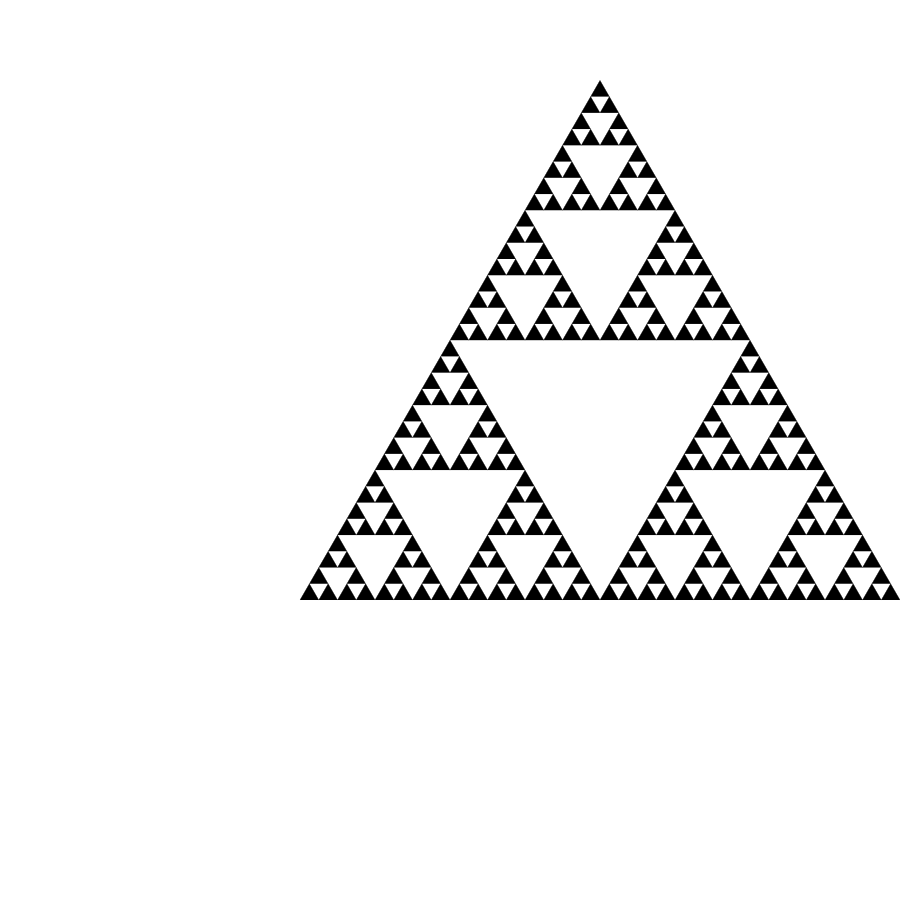

In [ ]:
drawPolygons(f1(5), 3, 3, (0.5, 0.5), strokeWidth=0.001).rasterize()


2. Write a function that that generates the nth generation of the  [following fractal](http://math.stonybrook.edu/~bplin/teaching/fall2022/mat331/images/fractal2.png).
 You may use the 'drawPolygon' function defined at the beginning of this notebook.

In [ ]:
def f2(n):
  '''
  Inputs: 
    n -- integer
  Returns: 
    polygons -- collections of polygons representing the fractal above
  '''
  translations = [
      [0, 0],
      [0, 1/3],
      [0, 2/3],
      [1/3, 0],
      [1/3, 2/3],
      [2/3, 0],
      [2/3, 1/3],
      [2/3, 2/3],
  ]

  if n == 0:
    squares = []
    square = np.array([[0,0,1,1],
                       [0,1,1,0]])
    squares.append(square)
    return squares
  
  old_squares = f2(n-1)
  new_squares = []

  for square in old_squares:
    scaled = square/3
    for translation in translations:
      new_squares.append(translate(scaled, translation, 4))

  return new_squares

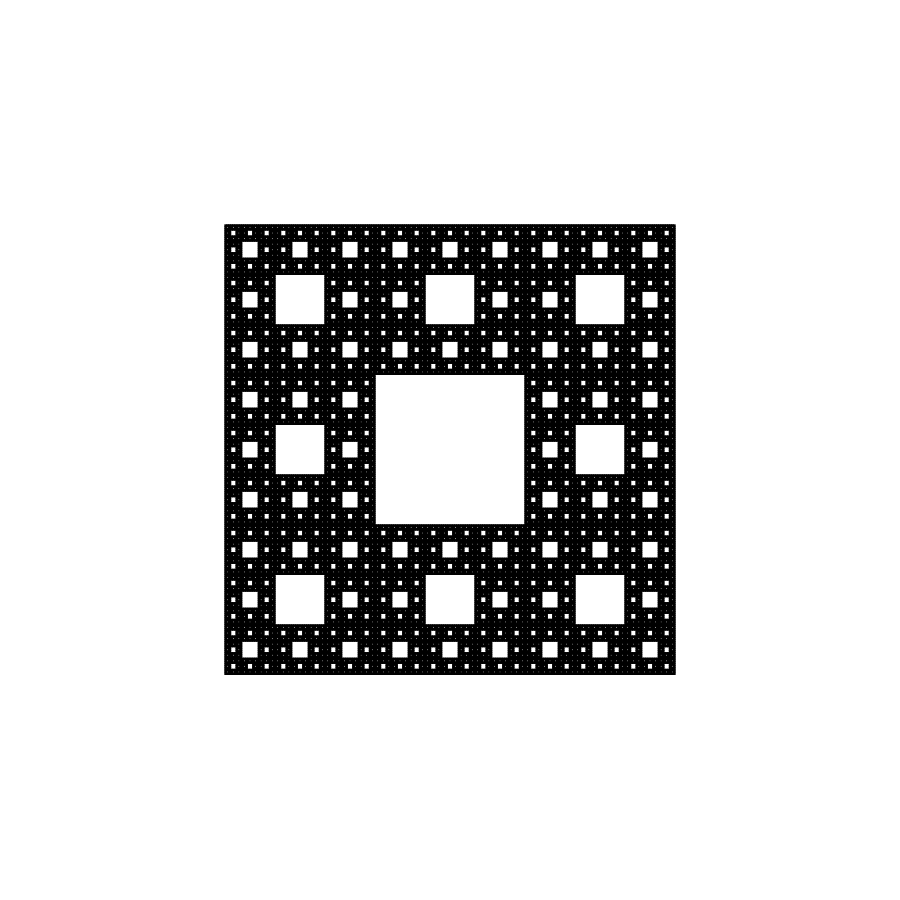

In [ ]:
drawPolygons(f2(5), 2, 2, (0.5, 0.5), strokeWidth=0.003).rasterize()

3. Here is another way to draw a picture of the escaping or non-escaping set. 
Suppose some point y is in the non-escaping of a function f.
Then all the pre-images of y must be in the non-escaping set too (think about it!)

For example, since we know that 0 doesn't escape for f(z)=z^2-1,
we also know that the solutions to z^2-1=0, which are -1 and 1, don't escape either.
Because applying f to -1 and 1 takes us back to 0.
Continuing onwards, we see that the solutions to (z^2-1=-1) and (z^2-1=1)
are also non-escaping. The solutions are {0,sqrt(2), -sqrt(2)}.
So now we know that the points -1, 1, 0, sqrt(2), -sqrt(2) are in the non-escaping set. 

By continuing this way we can get more and more points in the non-escaping set. If do this for a while and plot the points that we get, we get an approximation for the non-escaping set.

Draw the nonescaping set of f(z)=z^2+i using this method.

Hint: First, check that 0 is not escaping for f(z).

In [ ]:
#SOLUTIONS ARE THE PRE-IMAGES -> applying f(z) where z is the solution for f(Z) gets us back to the value for non-escaping f(Z)

import matplotlib.pyplot as plt
import numpy as np

def nonEscaping(iterations):
  '''
  Inputs:
    iterations -- an integer
  Returns 
    points -- the list of points z such that f^n(z)=0. Here f(z)=z^2+i and 
    f^n(z) means  the result of applying f to z, n times.
  '''
  points = []

  if iterations == 0:
    points.append(0)
    return points
  
  old_solutions = nonEscaping(iterations-1)
  for solution in old_solutions:
    points.append(solution)
    point = (solution-1j)**0.5
    points.append(point)
    points.append(-point)
    #print(points)
  
  return(points)

# Don't modify this, you can use this to plot the points coming out of 
# the previous function you wrote
def plotPoints(points):
  '''
  Plots the complex numbers given in the input
  
  Inputs:
    points -- list of complex numbers
  '''

  x_values = []
  y_values = []

  for point in points:
    x_values.append(point.real)
    y_values.append(point.imag)
    
  plt.scatter(x_values,y_values)

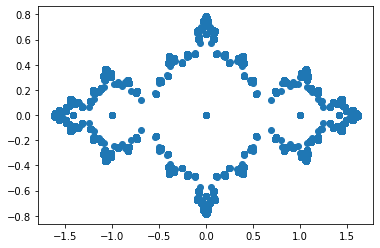

In [ ]:
plotPoints(nonEscaping(10))

4. Recall the Newton method for finding roots of a polynomial p(z)
https://en.wikipedia.org/wiki/Newton%27s_method

Given a guess z[n], let z[n+1]=p[z(n)]/p'[z(n)]

Let's test this method on quadratic polynomials. 

Write a function newtonstep(a,b,c, guess) that executes one step of the newton method for the quadratic polynomial p(z)=az^2+bz+c.


In [ ]:
def newtonstep(a,b,c,guess):
  '''
  Returns an improved guess for a root of the quadratic 
  az^2+bz+c
  Inputs:
    a,b,c, guess are all complex numbers
  '''

  def f(x):
    return a*(x**2) + b*x + c
  def f_prime(x):
    return 2*a*x + b
  
  return guess-(f(guess)/f_prime(guess))



5. We know that every quadratic polynomial has two roots. So, 
if the newton method converges, it will converge to one of the two roots. 
The root that it converges to depends on the initial guess.
e initial points, the method will converge to one

Draw a picture of this dependence for the quadratic z^2+1.
This quadratic has two roots, at 1j and -1j. 

Try all the possible initial guesses in [-2,2] (up to some resolution).

If the initial guess results in convergence to 1j, color it black. 
If the initial guess results in convergece to -1j, color it white. 
If the initial guess doesn't converge in a reasonable time, give it some other color.


[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


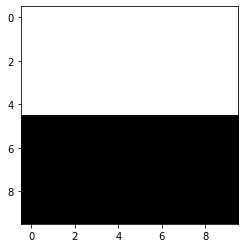

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

subs = 10
iterations = 100
tol = .1

results = np.zeros((subs, subs))

delta = 4/subs
for i in range(subs):
  for j in range(subs):
    guess = complex(-2+delta/2, -2+delta/2) + complex(i*delta, j*delta)
    for _ in range(iterations):
      guess = newtonstep(1, 0, 1, guess)
    if abs(guess.imag-1)<tol:
      results[j, i] = 1
    elif abs(guess.imag+1)<tol:
      results[j, i] = -1

#print(results)
plt.imshow(results, cmap = 'binary')

### Challenge question

1. Consider the non-escaping set for lambda z: z^3-16/(27 z). Plot it. 
Explain why it looks so similar to the fractal in Q1.

2. Do question 5 again, but for the polynomial z^3-1.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def nonEscapingMod(iterations):
  '''
  Inputs:
    iterations -- an integer
  Returns 
    points -- the list of points z such that f^n(z)=0. Here f(z)=z^3-16/(27z) and 
    f^n(z) means  the result of applying f to z, n times.
  '''
  points = []

  if iterations == 0:
    points.append(0)
    return points
  
  old_solutions = nonEscaping(iterations-1)
  for solution in old_solutions:
    points.append(solution)
    point = (solution+16)**(1/3)
    points.append(point)
    points.append(-point)
    #print(points)
  
  return(points)

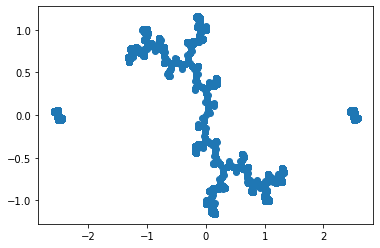

In [ ]:
plotPoints(nonEscapingMod(10))

This fractal likely takes such similar form to the fractal in Q1 because they are both of similar quadratic form f(z) = z^2 + c. f(z) = (z^3+16)/(27z) can also be written as f(z) = (z^2/27) + (16/27z). While the inverse term does separate this equation from that in Q1, this term is only particularly relevant at |z| approaches 0, and the quadratic term becomes dominant as z increases. These discrepancies are displayed in the fractal above.


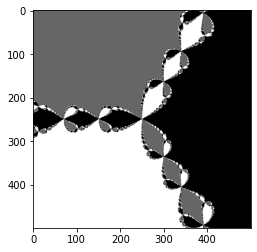

In [ ]:
def newtonstepcube(a,b,c,d,guess):
  '''
  Returns an improved guess for a root of the quadratic 
  az^3+bz^2+cz+d
  Inputs:
    a,b,c, guess are all complex numbers
  '''

  def f(x):
    return a*(x**3) + b*(x**2) + c*x + d
  def f_prime(x):
    return 3*a*(x**2) + 2*b*x + c
  
  return guess-(f(guess)/f_prime(guess))


subs = 500
iterations = 500
tol = .1

results = np.zeros((subs, subs))

#all solutions for z^3-1
sol_1 = complex(1, 0)
sol_2 = complex(-0.5, (3**0.5)/2)
sol_3 = complex(-0.5, -(3**0.5)/2)

delta = 4/subs
for i in range(subs):
  for j in range(subs):
    guess = complex(-2+delta/2, -2+delta/2) + complex(i*delta, j*delta)
    for _ in range(iterations):
      guess = newtonstepcube(1, 0, 0, -1, guess)
    if abs(guess-sol_1)<tol:
      results[j, i] = 1
    elif abs(guess-sol_2)<tol:
      results[j, i] = -1
    elif abs(guess-sol_3)<tol:
      results[j, i] = 0.2

#print(results)
plt.imshow(results, cmap = 'binary')